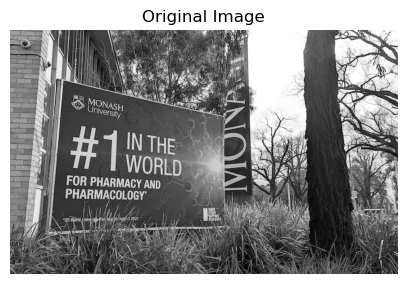

Original size: (690, 435) - resizing to 500x500
Loaded image shape: (500, 500)


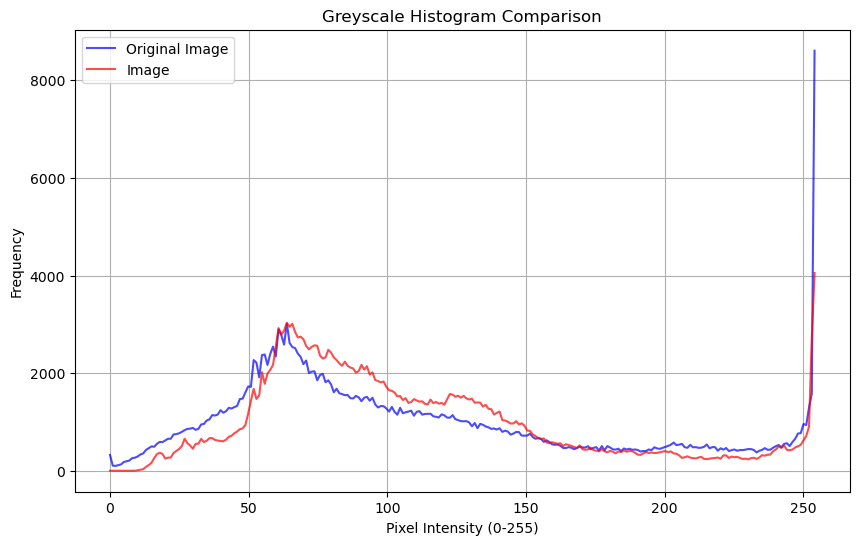

Kolmogorov-Smirnov test result:
Statistic: 0.0891
P-value: 0.0000e+00
The difference between the histograms is statistically significant (p < 0.05).
Blurred image and downscaled version saved successfully.


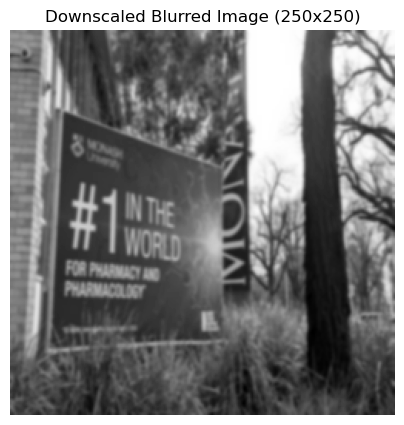

In [ ]:

# Author: [Thu Hang NGUYEN]
# Date: [17/06/2025]
# This notebook reads a 500x500 greyscale PNG image, applies a blur filter, computes and plots histograms of original and blurred images, statistically compares the histograms using scipy.stats, saves the blurred image and a downscaled version.
# LLM Assistance: Used ChatGPT to help generate and explain code logic.
# Requirements:
# - numpy
# - matplotlib
# - scipy
# - pillow (PIL)
#pip install numpy matplotlib scipy pillow (if they are not already installed )

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, ndimage
from PIL import Image

# --- Step 1: Load the greyscale PNG image ---
# Change this to your image filename
img_path = 'monashparkville.jpg'
# Open image with Pillow and convert to greyscale ('L'mode ensures 8-bit greyscale)
img = Image.open(img_path).convert('L')
#Display an original image
plt.figure(figsize=(5, 5))
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
# Verify size is 500x500
if img.size != (500, 500):
    print(f"Original size: {img.size} - resizing to 500x500")
    img = img.resize((500, 500), Image.Resampling.LANCZOS)
    # For Pillow >=10.0.0, use Image.Resampling.LANCZOS instead
    # img = img.resize((500, 500), Image.Resampling.LANCZOS)
else:
    print("Image is already 500x500 - no resizing needed.")
# Convert image to numpy array for processing
img_arr = np.array(img)
print(f"Loaded image shape: {img_arr.shape}")

# --- Step 2: Apply a blur filter ---
# Here we use a Gaussian filter from scipy.ndimage with sigma=2 (adjustable)
blurred_img_arr = ndimage.gaussian_filter(img_arr, sigma=2)
# Convert blurred numpy array back to PIL Image
blurred_img = Image.fromarray(np.uint8(blurred_img_arr))

# --- Step 3: Calculate and plot histograms of original and blurred images ---
# Compute histograms: 256 bins for 8-bit greyscale images
hist_orig, bins_orig = np.histogram(img_arr.flatten(), bins=256, range=(0, 255))
hist_blur, bins_blur = np.histogram(blurred_img_arr.flatten(), bins=256, range=(0, 255))
# Plot histograms on the same plot
plt.figure(figsize=(10, 6))
plt.plot(bins_orig[:-1], hist_orig, label='Original Image', color='blue', alpha=0.7)
plt.plot(bins_blur[:-1], hist_blur, label='Image', color='red', alpha=0.7)

plt.title('Greyscale Histogram Comparison')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# --- Step 4: Statistical comparison using scipy.stats ---
# Use the Kolmogorov-Smirnov test to compare the two histograms (distributions)
ks_stat, ks_pvalue = stats.ks_2samp(img_arr.flatten(), blurred_img_arr.flatten())
print(f"Kolmogorov-Smirnov test result:")
print(f"Statistic: {ks_stat:.4f}")
print(f"P-value: {ks_pvalue:.4e}")
if ks_pvalue < 0.05:
    print('The difference between the histograms is statistically significant (p < 0.05).')
else:
    print('No statistically significant difference detected between the histograms (p >= 0.05).')

# --- Step 5: Save the blurred image and a downscaled version ---
# Save the blurred image as PNG
blurred_img.save('blurred_image.png')
# Downscale to 250x250 pixels using Pillow's resize with ANTIALIAS filter
downscaled_img = blurred_img.resize((250, 250), Image.Resampling.LANCZOS)
# Save the downscaled image
downscaled_img.save('blurred_image_downscaled_250x250.png')
print('Blurred image and downscaled version saved successfully.')

#Display the downscaled image
plt.figure(figsize=(5, 5))
plt.imshow(downscaled_img,cmap='gray')
plt.title('Downscaled Blurred Image (250x250)')
plt.axis('off')
plt.show()